In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pathlib import Path

In [10]:
data_science_csv_file_path = Path("../resources/data_science_salaries.csv")

data_science_salaries_df = pd.read_csv(data_science_csv_file_path)

data_science_salaries_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## What is the distribution of Data Science salaries in each year?



In [11]:
average_yearly_salary = data_science_salaries_df.groupby('work_year')['salary_in_usd'].mean()
average_yearly_salary

work_year
2020    102250.866667
2021     99501.287037
2022    131788.543165
2023    150791.420757
2024    153124.084063
Name: salary_in_usd, dtype: float64

<Figure size 1200x800 with 0 Axes>

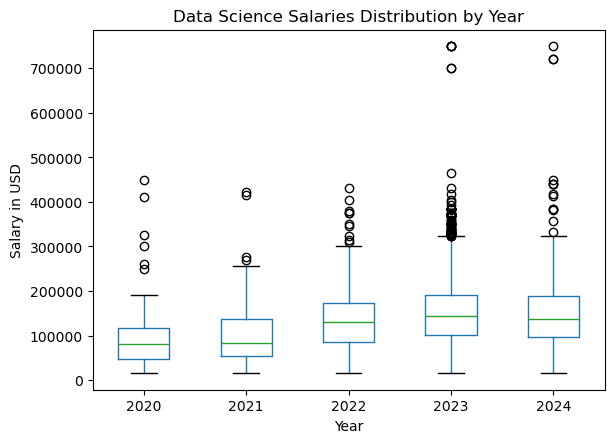

<Figure size 640x480 with 0 Axes>

In [12]:
# Box plot
plt.figure(figsize=(12, 8))
data_science_salaries_df.boxplot(by='work_year', column='salary_in_usd', grid=False)
plt.title('Data Science Salaries Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.suptitle('')
plt.show()

plt.savefig(Path('../figures/khadija/fig001.png'))

# Salary by Job Title

In [13]:
salary_by_job= data_science_salaries_df.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_by_job

,job_title,salary_in_usd
0,AI Architect,232058.600000
1,AI Developer,141140.888889
2,AI Engineer,162616.250000
3,AI Product Manager,120000.000000
4,AI Programmer,67382.333333
...,...,...
127,Sales Data Analyst,60000.000000
128,Software Data Engineer,111627.666667
129,Staff Data Analyst,79917.000000
130,Staff Data Scientist,134500.000000


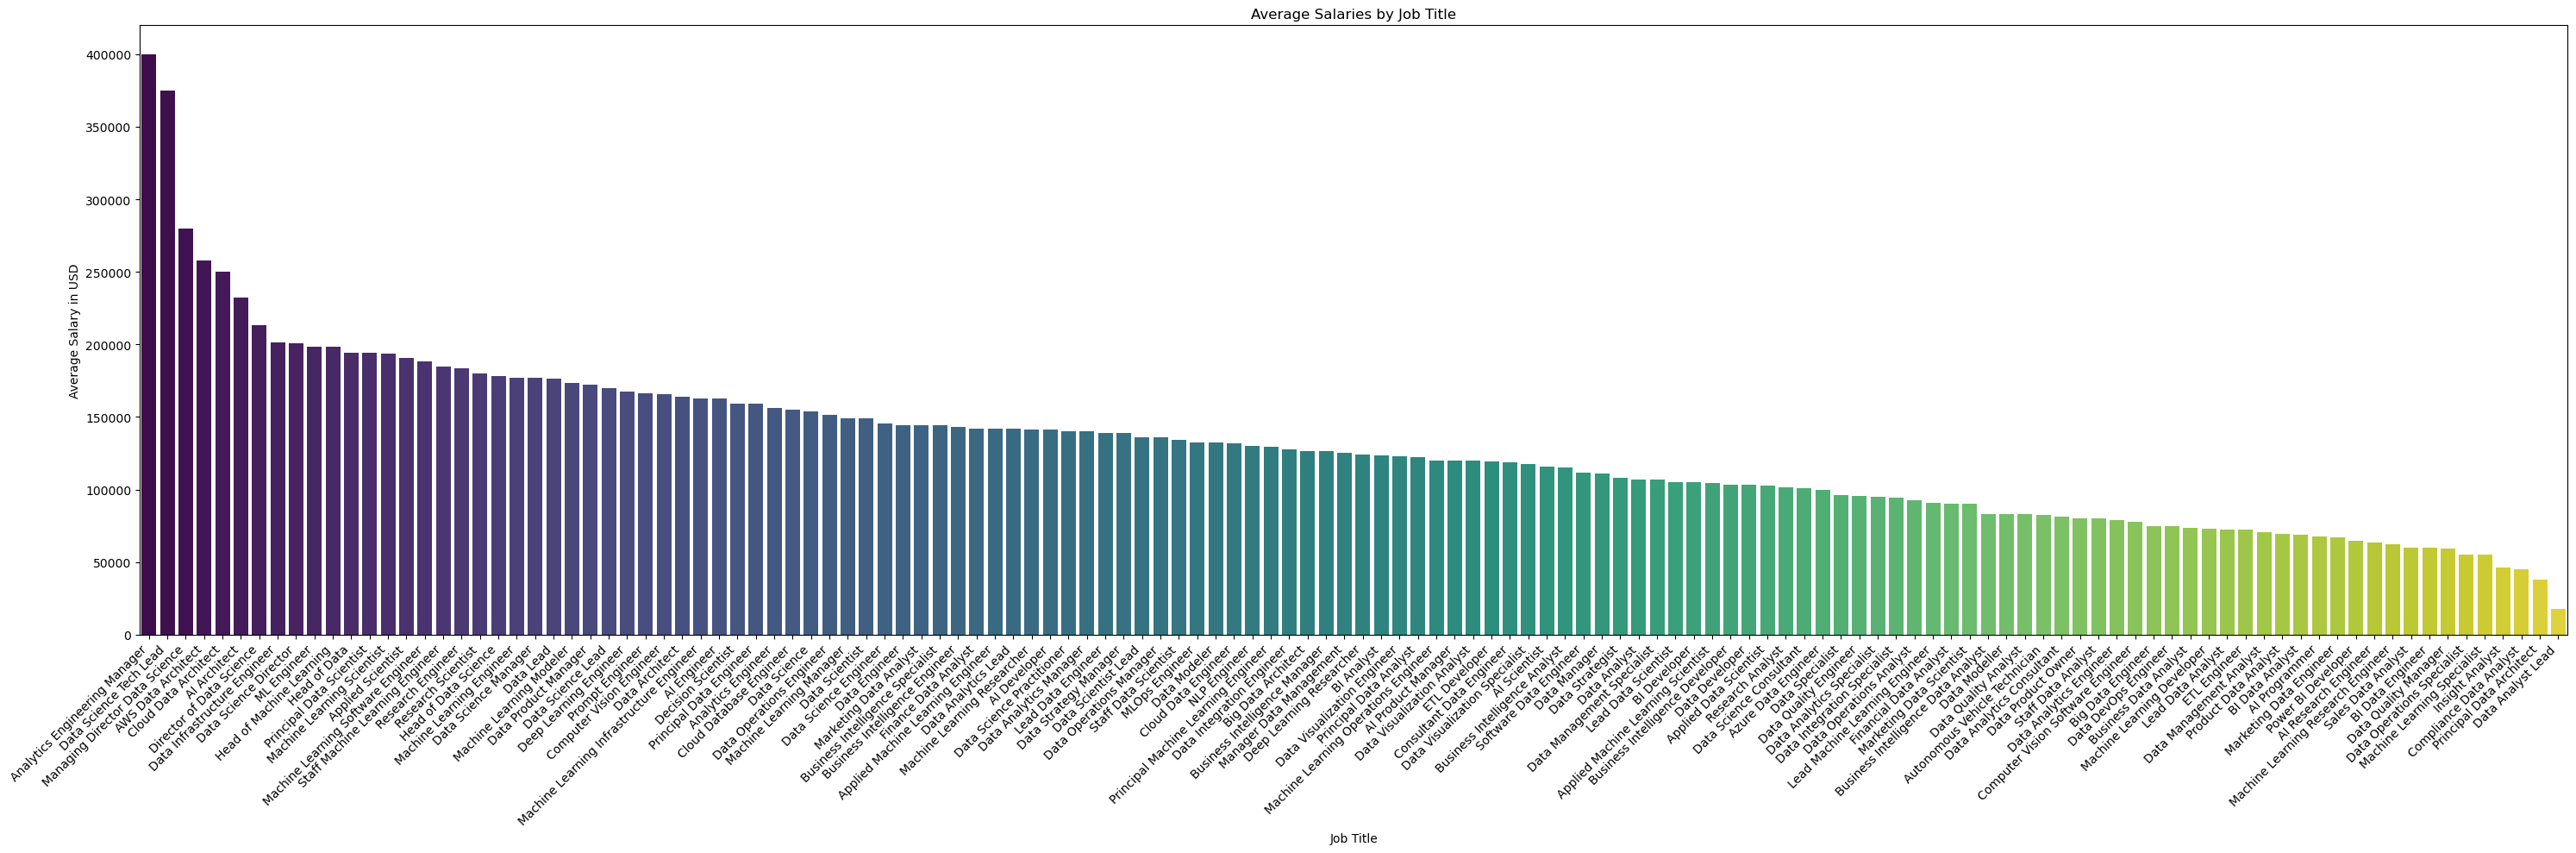

<Figure size 640x480 with 0 Axes>

In [14]:
sorted_salary= salary_by_job.sort_values(by='salary_in_usd',ascending=False)
plt.figure(figsize=(30, 10))
sns.barplot(x='job_title', y='salary_in_usd', data=sorted_salary, palette='viridis')
plt.title(f'Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

plt.savefig(Path('../figures/khadija/fig002.png'))

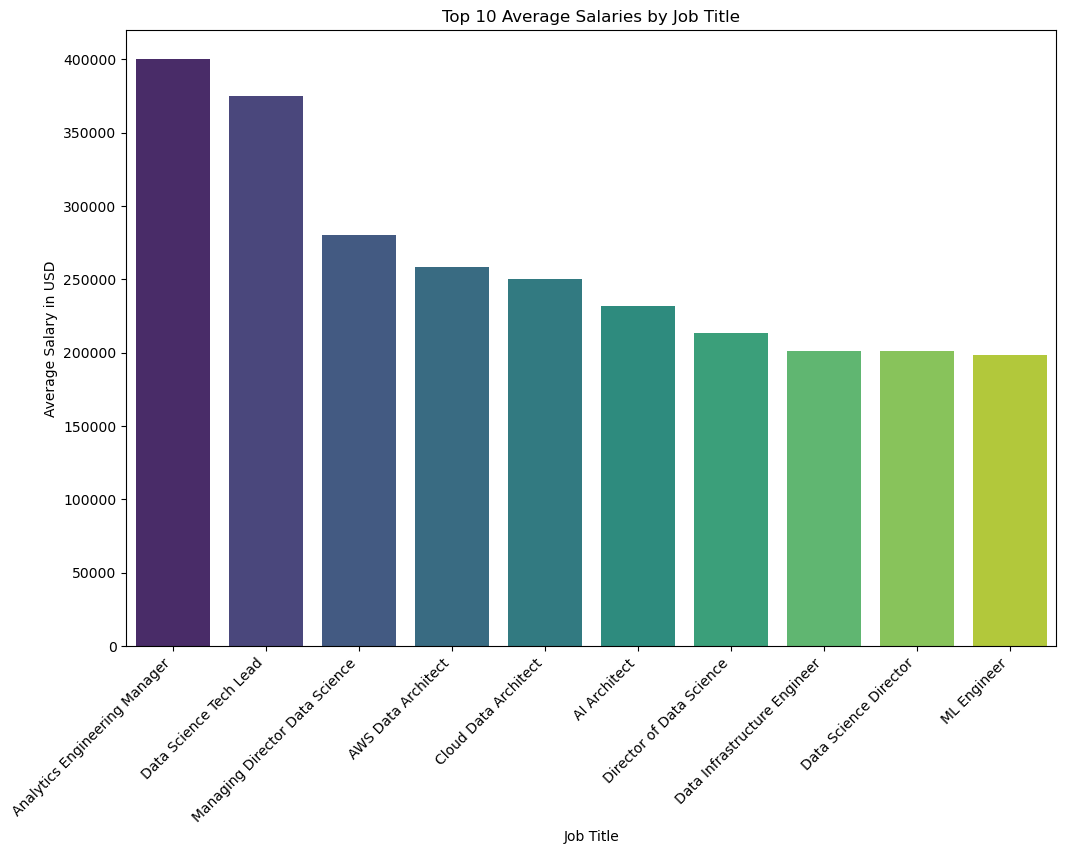

<Figure size 640x480 with 0 Axes>

In [15]:
# Select top Ten job titles based on mean salary
top_num = 10  
top_jobs = salary_by_job.nlargest(top_num, 'salary_in_usd')

# Plot a bar chart for the top Ten job titles
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title', y='salary_in_usd', data=top_jobs, palette='viridis')
plt.title(f'Top {top_num} Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

#Populated the top 10 job titles with the highest average salary
plt.savefig(Path('../figures/khadija/fig003.png'))

## Mean Salary Versus Exeperience



c:\Users\rttay\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


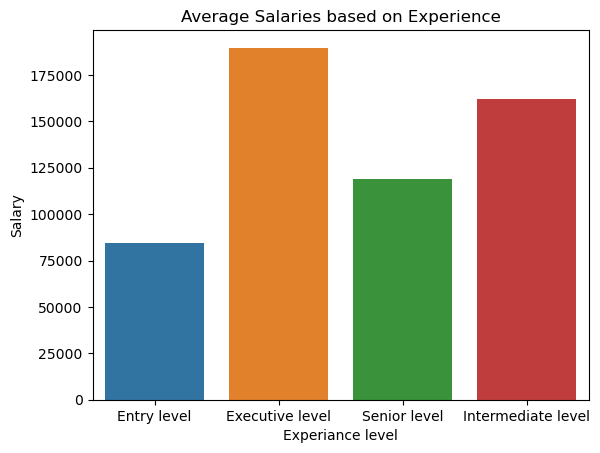

In [16]:
exp_salary=data_science_salaries_df['salary_in_usd'].groupby(data_science_salaries_df['experience_level']).mean()

plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Entry level', 'Executive level', 'Senior level', 'Intermediate level'],y=exp_salary.values)

plt.savefig(Path('../figures/khadija/fig004.png'))